In [1]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
file_name='movie_review.csv'
data=pd.read_csv(file_name)

In [3]:
data.head()

,review
0,films adapted from comic books have had plenty...
1,"for starters , it was created by alan moore ( ..."
2,to say moore and campbell thoroughly researche...
3,"the book ( or "" graphic novel , "" if you will ..."
4,"in other words , don't dismiss this film becau..."


In [4]:
data.dtypes

review    object
dtype: object

In [5]:
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

In [6]:
def clean_text(text):
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove parentheses, double quotes, and other symbols
    clean_text = re.sub(r'[\(\)\"\'\[\]\{\}\.,;:!?]', '', clean_text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = clean_text.split()
    clean_text = ' '.join([word for word in words if word.lower() not in stop_words])
    return clean_text

In [7]:
data['review'] = data['review'].apply(remove_html_tags)

In [8]:
data['review'] = data['review'].apply(clean_text)

In [9]:
data.head()

,review
0,films adapted comic books plenty success wheth...
1,starters created alan moore eddie campbell bro...
2,say moore campbell thoroughly researched subje...
3,book graphic novel 500 pages long includes nea...
4,words dont dismiss film source


In [10]:
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
data['sentiment_score'] = data['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++')

In [14]:
kmeans.fit(data[['sentiment_score']])
# Get cluster labels
data['cluster'] = kmeans.labels_

# Separate reviews into "good movies" and "bad movies" clusters
good_movies_cluster = data[data['cluster'] == 0]['review']
bad_movies_cluster = data[data['cluster'] == 1]['review']

C:\Users\Mostafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
print("Good Movies Cluster:")
print(good_movies_cluster)
print("\nBad Movies Cluster:")
print(bad_movies_cluster)

Good Movies Cluster:
0        films adapted comic books plenty success wheth...
2        say moore campbell thoroughly researched subje...
4                           words dont dismiss film source
5        get past whole comic book thing might find ano...
6        getting hughes brothers direct seems almost lu...
                               ...                        
64709    meanwhile bros overbearing father dan hedaya w...
64713    alas joke--a rather lazy takeoff _jerry_maguir...
64715      lack inspiration traced back insipid characters
64718                        bump unsuspecting women thats
64719    watching _a_night_at_the_roxbury_ youll left e...
Name: review, Length: 37430, dtype: object

Bad Movies Cluster:
1        starters created alan moore eddie campbell bro...
3        book graphic novel 500 pages long includes nea...
13       comic dont bother cloaking identity ripper scr...
16                        dont worry - itll make sense see
17       onto hells appearance

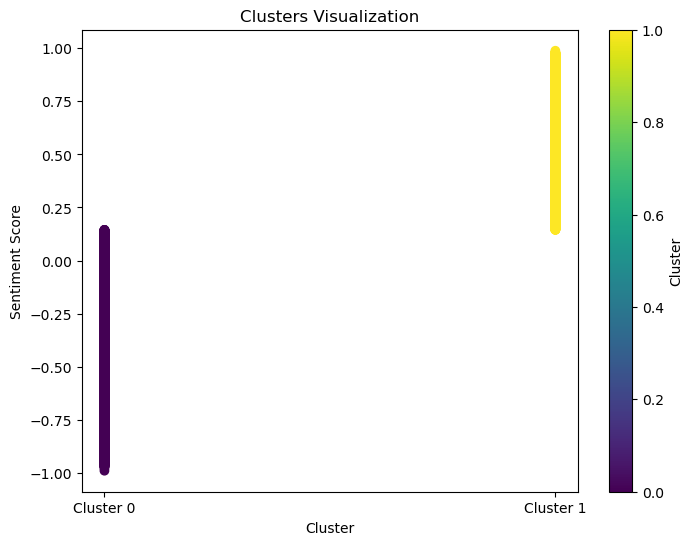

In [19]:
import matplotlib.pyplot as plt

# Plot sentiment scores against cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(data['cluster'], data['sentiment_score'], c=data['cluster'], cmap='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Cluster')
plt.ylabel('Sentiment Score')
plt.xticks(np.arange(len(data['cluster'].unique())), ['Cluster 0', 'Cluster 1'])
plt.colorbar(label='Cluster')
plt.show()


In [20]:
cluster_counts = data['cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
cluster
0    37430
1    27290
Name: count, dtype: int64


In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Example new reviews
new_reviews = [
    "This movie was amazing! I loved every minute of it.",
    "I couldn't stand this film. It was boring and poorly acted.",
    "The plot of this movie was confusing, but the acting was excellent.",
    "I highly recommend this film. It's a must-watch!",
    "Overall, this movie was disappointing. I expected more.",
    "The special effects in this film were impressive, but the storyline lacked depth."
]

# Preprocess the new reviews and calculate sentiment scores
sentiment_scores = [sia.polarity_scores(review)['compound'] for review in new_reviews]

# Predict the cluster labels for the sentiment scores using the trained K-means model
predicted_clusters = kmeans.predict(np.array(sentiment_scores).reshape(-1, 1))

# Display the predicted cluster labels for the new reviews
for i, review in enumerate(new_reviews):
    print("Review:", review)
    print("Predicted Cluster:", predicted_clusters[i])
    print()


Review: This movie was amazing! I loved every minute of it.
Predicted Cluster: 1

Review: I couldn't stand this film. It was boring and poorly acted.
Predicted Cluster: 0

Review: The plot of this movie was confusing, but the acting was excellent.
Predicted Cluster: 1

Review: I highly recommend this film. It's a must-watch!
Predicted Cluster: 1

Review: Overall, this movie was disappointing. I expected more.
Predicted Cluster: 0

Review: The special effects in this film were impressive, but the storyline lacked depth.
Predicted Cluster: 1



C:\Users\Mostafa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
